In [2]:
# 패키지 참조

import pandas as pd
from pandas import read_excel, DataFrame, merge, cut, get_dummies
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sb
import numpy as np
from patsy import dmatrix
import sys
from os import path, mkdir
import folium
import os

sys.path.append("../") # helper 모듈의 위치 확인 후 입력 결정
import helper

# jupyter 상에서 SVG 이미지를 표시하기 위한 패키지(jupyter 기본 내장 패키지)
from IPython.display import SVG
# TAG로부터 원하는 내용을 추출하는 클래스 -> SVG 이미지의 핸들링을 위함
from bs4 import BeautifulSoup
# 원격지의 svg 파일의 내용을 읽어오기 위함.
import requests


In [3]:
origin = read_excel("엑셀자료/세종시_공공기관위치.xlsx")
#../는 상위폴더를 의미,'선생님자료' 폴더가 현재 자리 기준으로 
#2번 위에 있는 상위폴더에 있으므로 ../를2번 기재
origin

공공기관명                    도로명주소                    지번주소  \
0              세종특별자치시청       세종특별자치시 한누리대로 2130         세종특별자치시 보람동 663   
1             세종특별자치시의회       세종특별자치시 한누리대로 2120       세종특별자치시 보람동 625-6   
2            세종특별자치시보건소      세종특별자치시 조치원읍 건강길 16   세종특별자치시 조치원읍 교리 129-1   
3                농업기술센터     세종특별자치시 연서면 월하천로 289      세종특별자치시 연서면 쌍전리 16   
4               시설관리사업소      세종특별자치시 전동면 심동로 354      세종특별자치시 전동면 심중리 82   
5               조치원읍사무소    세종특별자치시 조치원읍 새내16길 17     세종특별자치시 조치원읍 교리 9-1   
6                연기면사무소       세종특별자치시 연기면 당산로 81  세종특별자치시 연기면 한별리 317-34   
7                연동면사무소       세종특별자치시 연동면 내송길 20     세종특별자치시 연동면 내판리 9-2   
8                부강면사무소      세종특별자치시 부강면 부강5길 38     세종특별자치시 부강면 부강리 138   
9                금남면사무소       세종특별자치시 금남면 용포로 57   세종특별자치시 금남면 용포리 122-1   
10               장군면사무소    세종특별자치시 장군면 장척로 400-1     세종특별자치시 장군면 도계리 167   
11               연서면사무소      세종특별자치시 연서면 대첩로 238     세종특별자치시 연서면 성제리 293   
12               전의면사무소  세종특별자치시 전의면 운주산로 1204-7   세종특별자치시 전의면 읍내리 207-3   
13               전동면사무소     세종특별자치시 전동면 운주산로 386     세종특별자치시 전동면 노장리 583   
14               소정면사무소     세종특별자치시 소정면 소정구길 204      세종특별자치시 소정면 소정리 48   
15              한솔동주민센터          세종특별자치시 노을3로 85         세종특별자치시 한솔동 964   
16              도담동주민센터           세종특별자치시 보람로 77         세종특별자치시 도담동 645   
17              아름동주민센터         세종특별자치시 보듬3로 114        세종특별자치시 아름동 1286   
18              종촌동주민센터         세종특별자치시 도움3로 125         세종특별자치시 종촌동 677   
19              고운동주민센터          세종특별자치시 마음로 284        세종특별자치시 고운동 1382   
20              보람동주민센터          세종특별자치시 호려울로 42       세종특별자치시 보람동 630-4   
21              새롬동주민센터           세종특별자치시 새롬로 14        세종특별자치시 새롬동 66-1   
22              다정동주민센터         세종특별자치시 다정남3로 10     세종특별자치시 다정동 363-185   
23              대평동주민센터         세종특별자치시 대평동 90-1        세종특별자치시 대평동 92-1   
24                세종경찰서      세종특별자치시 조치원읍 군청로 36  세종특별자치시 조치원읍 번암리 66-16   
25           세종특별자치시교육청       세종특별자치시 한누리대로 2154      세종특별자치시 보람동 664-17   
26                세종우체국         세종특별자치시 시청대로 180       세종특별자치시 보람동 624-6   
27      세종특별자치시 선거관리위원회      세종특별자치시 조치원읍 대첩로 59  세종특별자치시 조치원읍 신흥리 269-2   
28     대전지방법원 세종특별자치시법원    세종특별자치시 조치원읍 새내16길 27    세종특별자치시 조치원읍 교리 8-11   
29    대전지방법원 세종특별자치시등기소    세종특별자치시 조치원읍 새내16길 27    세종특별자치시 조치원읍 교리 8-11   
30  대전지방노동청 공주고용센터세종출장소     세종특별자치시 조치원읍 조치원로 22     세종특별자치시 조치원읍 원리 6-4   
31        공주세무서 세종민원봉사실     세종특별자치시 조치원읍 충현로 195  세종특별자치시 조치원읍 침산리 256-5   
32                 조치원역     세종특별자치시 조치원읍 으뜸길 215  세종특별자치시 조치원읍 원리 141-62   
33                세종세무서          세종특별자치시 가름로 232         세종특별자치시 어진동 657   

           위도          경도          전화번호  \
0   36.480058  127.289039  044-300-3114   
1   36.480021  127.290451  044-300-7000   
2   36.605676  127.296515  044-301-2000   
3   36.572999  127.283188  044-301-2500   
4   36.670859  127.300290  044-301-3500   
5   36.604548  127.298460  044-301-5000   
6   36.541827  127.273531  044-301-5200   
7   36.559210  127.326691  044-301-5300   
8   36.529426  127.370753  044-301-5400   
9   36.463737  127.280287  044-301-5500   
10  36.496674  127.205619  044-301-5600   
11  36.592569  127.271522  044-301-5700   
12  36.680050  127.203050  044-301-5800   
13  36.656053  127.263728  044-301-5900   
14  36.722309  127.158598  044-301-6000   
15  36.479174  127.254667  044-301-6100   
16  36.515405  127.261746  044-301-6200   
17  36.512352  127.246890  044-301-6300   
18  36.504635  127.246869  044-301-6400   
19  36.519724  127.236590  044-301-6600   
20  36.478775  127.290614  044-301-6700   
21  36.486070  127.256697  044-301-6800   
22  36.494524  127.250343  044-301-7100   
23  36.470961  127.279200  044-301-6900   
24  36.588229  127.294874  044-860-0324   
25  36.478089  127.286369  044-320-1000   
26  36.480549  127.291856  044-410-1004   
27  36.594793  127.289853  044-866-1390   
28  36.604511  127.299183  044-867-4500   
29  36.604511  127.299183  044-867-0999   
30  36.601187  127.29915

In [4]:
# zoom_start: 배율 1~22 (여기서는 출력 안함)
map_osm=folium.Map(location=[36.4799919, 127.2890511],zoom_start=12)

#마커 클릭시 폰트 색깔 지정
html="<font color='blue' style='white-space:nowrap'><b>%s</b></font>"

#데이터프레임의 행 수만큼 반복하면서 마커 생성
for i in origin.index:
    #행 우선 접근 방식으로 값 추출하기
    name=origin.loc[i,'공공기관명']
    lat=origin.loc[i,'위도']
    lng=origin.loc[i,'경도']

    #추출한 정보를 지도에 표시
    popup_html=folium.Popup(html%name,parse_html=False)
    marker=folium.Marker([lat,lng],popup=popup_html)
    marker.add_to(map_osm)

    #웹 페이지 파일이 저장될 폴더 생성
    if not path.exists('output'):
        mkdir('output')

    map_osm.save('output/세종시_공공기관_위치.html') #파일이 저장될 위치

map_osm

In [5]:
df=origin.copy()

# 지번주소 라는 컬럼에서 문자열 데이터를 split(자르기) 후에 공백을 기준으로 2번째 열만 선택 
gu=df['지번주소'].str.split(" ",expand=True)[1]

# assign함수 이용하여 'gu'컬럼을 '구'로 변경해서 추가
df1=df.assign(행정구=gu)
df1.drop(["전화번호","홈페이지",'등록기준일'],axis=1,inplace=True)
df1.head()

공공기관명                 도로명주소                   지번주소         위도  \
0    세종특별자치시청    세종특별자치시 한누리대로 2130        세종특별자치시 보람동 663  36.480058   
1   세종특별자치시의회    세종특별자치시 한누리대로 2120      세종특별자치시 보람동 625-6  36.480021   
2  세종특별자치시보건소   세종특별자치시 조치원읍 건강길 16  세종특별자치시 조치원읍 교리 129-1  36.605676   
3      농업기술센터  세종특별자치시 연서면 월하천로 289     세종특별자치시 연서면 쌍전리 16  36.572999   
4     시설관리사업소   세종특별자치시 전동면 심동로 354     세종특별자치시 전동면 심중리 82  36.670859   

           경도   행정구  
0  127.289039   보람동  
1  127.290451   보람동  
2  127.296515  조치원읍  
3  127.283188   연서면  
4  127.300290   전동면

In [8]:
#추가된 "구" 컬럼을 이용하여 각 행정구별 숙박업소(호텔,호스텔) 갯수 확인해보기
cdf=DataFrame(df1.filter(['행정구']).value_counts(),columns=['count']).reset_index()
cdf

행정구  count
0   조치원읍      9
1    보람동      5
2    전동면      2
3    연서면      2
4    고운동      1
5    연기면      1
6    종촌동      1
7    전의면      1
8    장군면      1
9    연동면      1
10   어진동      1
11   금남면      1
12   아름동      1
13   소정면      1
14   새롬동      1
15   부강면      1
16   도담동      1
17   대평동      1
18   다정동      1
19   한솔동      1

> 막대그래프는 진행하지 않음(수치가 너무 편향되서 의미 없다고 판단) 

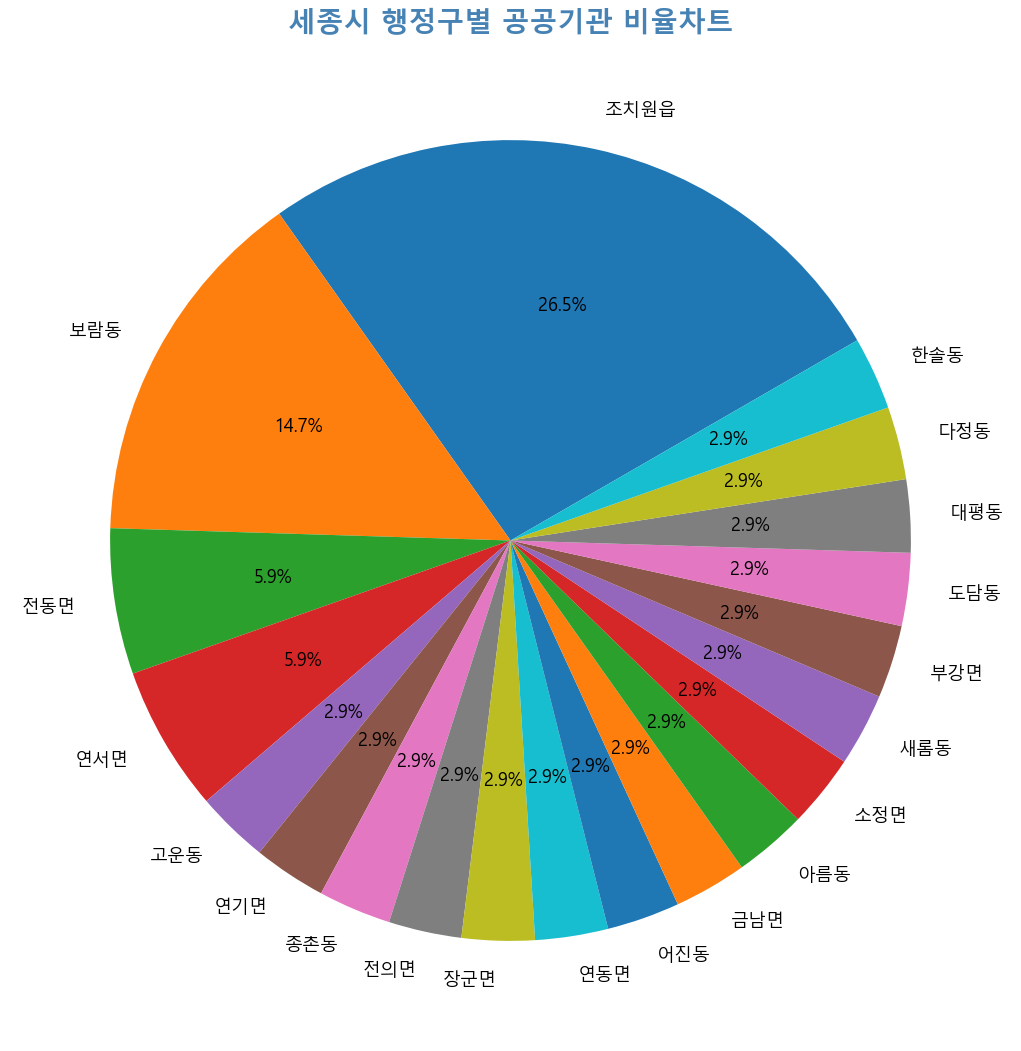

In [11]:
# 5)파이차트 시각화

plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.unicode_minus"] = False

colors = ['tomato', 'coral', 'orangered', 'darkorange', 'salmon','lime', 'limegreen', 'chartreuse', 'greenyellow']
plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (13, 13)
plt.figure()
plt.title("세종시 행정구별 공공기관 비율차트",color='steelblue',fontweight='bold',fontsize=20)
plt.pie(cdf['count'], labels=cdf['행정구'], autopct='%0.1f%%',startangle=30)
plt.show()
plt.close()

![세종시_수작업](세종시_수작업.png)

확인 결과 공공기관은 조치원읍이 가장 많은곳으로 보여진다.